## Load git

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
if IN_COLAB:
    # Change MisterMap to your github account name and make fun
    !pip install --upgrade -q git+https://github.com/PDementevna/pytorch_learning.git


In [ ]:
from google.colab import output

def notify_start():
    output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/' +\
        'pronunciation/2019-10-21/audio/tr/train_en_us_1.mp3").play()')
    output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/' +\
        'pronunciation/2019-10-21/audio/st/start_en_us_1.mp3").play()')

def notify_end():
    output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/' +\
        'pronunciation/2019-10-21/audio/tr/train_en_us_1.mp3").play()')
    output.eval_js('new Audio("https://ssl.gstatic.com/dictionary/static/' +\
        'pronunciation/2019-10-21/audio/do/done_en_us_1.mp3").play()')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
MAIN_DIR = '/content/drive/My Drive/dataset'


In [0]:
import torch 
from torchvision import transforms, datasets
import torchvision 

In [0]:

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

###Load data from the dataset

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

###Batch_size: the number of samles which the neural network will get in one run (usually from 8 to 64, regardless to the memory size of the PC)

###Shuffle: we need to show to the neural network a variety of data in order to don't have the unexpected result

In [4]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In the data variable there is 2 tensors: 

1) for the image (there are 10 images in batch, so if we want to show first image, we should get access to data[0][0]: 0 - for 1 tensor, and 0 in the tensor)

2) for the actual true numbers, so if we want to show first true value correspondent to data[0][0], we need to get access to data[1][0]: 1 - for the 2nd tensor, 0 - in the tensor

In [5]:
x, y = data[0][0], data[1][0]
print(y)

tensor(2)


In [0]:
import matplotlib.pyplot as plt


In [7]:
data[0][0].shape

torch.Size([1, 28, 28])

The shape of the data[0][0] is not convienient one, it has 1 in the first dimension for torch manipulations, therefore we need to squeeze data or use view parameter

In [8]:
data[0][0].squeeze().shape

torch.Size([28, 28])

In [9]:
data[0][0].view(28,28).shape

torch.Size([28, 28])

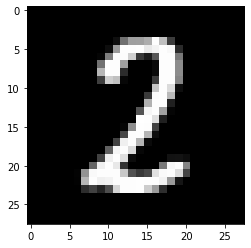

In [10]:
plt.imshow(data[0][0].squeeze(), cmap='gray')

###We need to be sure that our data is totally ballanced, so we will check how many samles for each number we have in dataset

In [11]:
total = 0
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0 , 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1
  
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


####So the data is pretty balanced, we don't need to change something

##Let's create neural network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):

  def __init__(self):
    # launching the inicialization of parent class nn.Module in next line 
    super().__init__() 

    # definition of the fully conected layers (fc)
    self.fc1 = nn.Linear(28*28, 64)
    # input for the first layer is the flatten image and output can be any number but we stay with 64
    # next layer has to take output number from the previous layer, so in our case it's 64. Let's leave 64 for output as well
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    # fo the last layer we have 64 as input but in the result we expect 10 classes (because we have 10 numbers: 0 1 2 3 4 5 6 7 8 9 10)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    # relu - it's an activation function which is has to be in order to magnitude the output from layers in right way (apply the sigmoid function
    # and return the result in range from 0 to 1)
    x = F.relu(self.fc2(x))

    # here in forward method we can put some logic with operator if (if we need it)

    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = Net()
net


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
X = torch.rand((28, 28))
X = X.view(-1,28*28)
#  -1 in view method is the hint to the pytorch to fill this dimension by itself, for us it doesn't matter, what is the number is there

In [0]:
output = net(X)

In [17]:
output

tensor([[-2.2528, -2.2875, -2.3527, -2.3339, -2.3212, -2.3338, -2.1494, -2.4171,
         -2.2818, -2.3185]], grad_fn=<LogSoftmaxBackward>)

In [18]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

# number of passes through the whole of dataset
EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data
    # we need to set the gradients to zero because through passing the batches they accumulating
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    
    # our true value is a scalar, therefore, we can't use just MSE, instead of it we will use nll_loss
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)



tensor(0.0126, grad_fn=<NllLossBackward>)
tensor(0.7481, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)


In [19]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


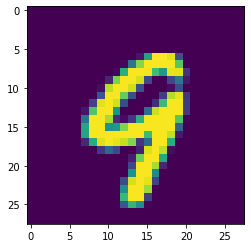

In [20]:
plt.imshow(X[0].view(28,28))
plt.show()

In [23]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(9, grad_fn=<NotImplemented>)


#Introduction to the Convolution networks


---



Convolution networks are used usually for image tasks but recently CNN outperform recurent NN in sequency type of data.

Convolution goal is to locate features. The box is convolutional kernel, it ends up with the number which means the found features. So CNN is just dramatically simplify the image and gets the features from it.



![example](https://www.researchgate.net/profile/Konstantin_Pervunin/publication/309487032/figure/fig2/AS:422116370718724@1477651793847/a-Illustration-of-the-operation-principle-of-the-convolution-kernel-convolutional-layer.png)

Usually after convolution procedure starts pooling, which is basically finds the maximum number from the kernel and leave it in the cell.
The 1st layer of CNN tries to divide your image by easiest parts like corners, edges, curves. Then, the 2nd layer is trying to find the patterns a bit more complex like circles, rectangles and so on. The 3rd searches for combination of circles and rectangles and so on. 